Preprocessing steps :- Including data creation etc.
Creating a tab separated dataset file with the format :-
Dialogue act label \t Sentence

In [2]:

import os 
from nltk.corpus import nps_chat as nps
def get_dialogue_data(output_file):
    open(output_file,'w').close();
    posts=nps.xml_posts()
    with open(output_file,'a') as fileWrite:
        for eachPost in posts:
            fileWrite.write(eachPost.get('class').lower()+'\t'+eachPost.text)
            fileWrite.write('\n')
DATA_DIR= os.getcwd()
DATA_FILE='dialogues.txt'  
get_dialogue_data(os.path.join(DATA_DIR,DATA_FILE))

In [ ]:
Importing all the dependendent packages from keras, sklearn, matplot and nltk

In [3]:
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np


/Users/gowthamkannan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/gowthamkannan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
Creating the vocabulary, maximum sentence length etc.

In [4]:
max_len = 0
word_freqs = collections.Counter()
num_recs = 0
# DATA_DIR='/Users/gowthamkannan/Desktop/Assignments/Computational_Linguistics/Assignment_2/pos_tagger/data'
# DATA_FILE='dialogues.txt'
ftrain = open(os.path.join(DATA_DIR, DATA_FILE), 'rb')
label_list=[]
for line in ftrain:
    label, sentence = line.strip().split(b'\t')
    
#     print(label,sentence)
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
    label=label.decode("ascii","ignore").lower()
    label_list.append(label)
    if len(words) > max_len:
        max_len = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
# print(word_freqs)
label_list=list(set(label_list))
nos_classes=len(label_list)
# print(len(label_list))
ftrain.close()
MAX_FEATURES=len(word_freqs)
MAX_SENTENCE_LENGTH=max_len
print(MAX_SENTENCE_LENGTH)

['bye', 'accept', 'ynquestion', 'yanswer', 'emphasis', 'statement', 'other', 'whquestion', 'nanswer', 'greet', 'clarify', 'continuer', 'emotion', 'reject', 'system']
87


Creating the word-index and index-word dictionary for the embedding layer to use.

In [5]:
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word2index = {x[0]: i+2 for i, x in
enumerate(word_freqs.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}

Type casting the input text to index of the word so that the tensor can be fed to neural network model. The below code also builds the output vector as a tensor.

In [6]:
X = np.empty((num_recs, ), dtype=list)
nos_classes=15
y = np.zeros((num_recs, nos_classes))
i = 0
f_train = open(os.path.join(DATA_DIR, DATA_FILE), 'rb')
for line in f_train:
    label,sentence=line.strip().split(b'\t')
    words = nltk.word_tokenize(sentence.decode("ascii", "ignore").lower())
    label=label.decode("ascii","ignore").lower()
    seqs=[]
    l=[0]*nos_classes
    for word in words:
        if word in word2index.keys():
            seqs.append(word2index[word])
        else:
            seqs.append(word2index['UNK'])
    X[i]=seqs
    l[label_list.index(label)]=1
    y[i]=l
    i+=1
f_train.close()
print(MAX_SENTENCE_LENGTH)

X=sequence.pad_sequences(X,maxlen=MAX_SENTENCE_LENGTH)
    

87


Spliting the dataset for training and testing.

In [7]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

Initializing the network model using keras.

In [8]:
EMBEDDING_SIZE=128
HIDDEN_LAYER_SIZE=50
BATCH_SIZE=32
NUM_EPOCHS=7
nos_classes=15
model=Sequential()
model.add(Embedding(vocab_size,EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(HIDDEN_LAYER_SIZE,dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(nos_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])


Training the model.

In [10]:
history=model.fit(Xtrain,ytrain,batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest,ytest))

Train on 8453 samples, validate on 2114 samples
Epoch 1/7
8453/8453 [==============================] - 77s 9ms/step - loss: 1.3101 - acc: 0.6230 - val_loss: 0.8991 - val_acc: 0.7488
Epoch 2/7
8453/8453 [==============================] - 64s 8ms/step - loss: 0.7533 - acc: 0.7929 - val_loss: 0.7335 - val_acc: 0.7923
Epoch 3/7
8453/8453 [==============================] - 68s 8ms/step - loss: 0.5551 - acc: 0.8502 - val_loss: 0.6946 - val_acc: 0.8146
Epoch 4/7
8453/8453 [==============================] - 68s 8ms/step - loss: 0.4214 - acc: 0.8877 - val_loss: 0.6855 - val_acc: 0.8174
Epoch 5/7
8453/8453 [==============================] - 61s 7ms/step - loss: 0.3356 - acc: 0.9045 - val_loss: 0.6884 - val_acc: 0.8193
Epoch 6/7
8453/8453 [==============================] - 74s 9ms/step - loss: 0.2711 - acc: 0.9232 - val_loss: 0.7111 - val_acc: 0.8212
Epoch 7/7
8453/8453 [==============================] - 66s 8ms/step - loss: 0.2210 - acc: 0.9375 - val_loss: 0.7408 - val_acc: 0.8193


Plotting the performace of the model in the trainig.

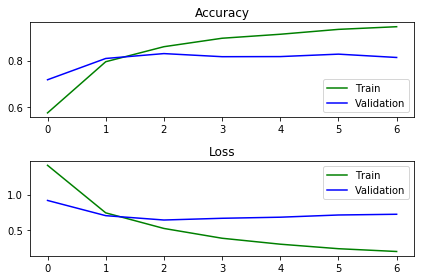

In [21]:
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="g", label="Train")
plt.plot(history.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

To get the label of a text fed to the network after training. 

In [17]:
new_X = np.empty((1, ), dtype=list)
test_sentence="yo, 10-19-20sUser133"
seqs=[]
for word in test_sentence.split():
    if word in word2index.keys():
        seqs.append(word2index[word])
    else:
        seqs.append(word2index['UNK'])
print(seqs)
new_X[0]=seqs
new_X=sequence.pad_sequences(new_X,maxlen=MAX_SENTENCE_LENGTH)
y=model.predict(new_X)
label=label_list[np.argmax(y)]
print(label)

[1, 1]
